In [1]:
import os
import random

from ocr.helpers.plot import *
from ocr.modules.OCR import ocr

d:\AppData\miniconda3\envs\ocr\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Device set to use cpu
d:\AppData\miniconda3\envs\ocr\Lib\site-packages\torch\nn\modules\transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Model weight C:\Users\dinhd\AppData\Local\Temp\vgg_transformer.pth exsits. Ignore download!


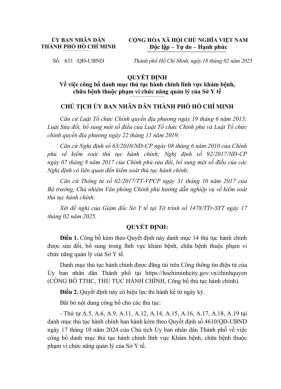

In [ ]:
files = os.listdir("./data/img_data")
file = random.choice(files)
img = cv2.imread(f"./data/img_data/{file}")

display_img(img)
ocr.predict(img)